In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import style_plot
import solve_laplace_operator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
nums_Vs_params = np.linspace(9**0.5, 91**0.5, 21)**2
print(nums_Vs_params)

[ 9.         11.06872672 13.35127169 15.84763489 18.55781633 21.48181602
 24.61963394 27.9712701  31.5367245  35.31599714 39.30908802 43.51599714
 47.9367245  52.5712701  57.41963394 62.48181602 67.75781633 73.24763489
 78.95127169 84.86872672 91.        ]


In [183]:
coefficients = {}

for en, nums_Vs_param in enumerate(nums_Vs_params):

    print(f"graph {en} / {len(nums_Vs_params - 1)}")

    g = Aperiodic_Monotile(nums_Vs_param)
    g = construct_graph.patch_graph.Patch(g)

    coefficients[g.num_Vs] = {}

    print(f"\nnum_Vs = {g.num_Vs}\n")
    eq = construct_graph.patch_graph.Cell_Problem(g)
    xi = eq.solve_corrector_equation()

    coefficients[g.num_Vs][0] = eq.construct_homogenized_tensor(xi)

graph 0 / 21

num_Vs = 421

graph 1 / 21

num_Vs = 637

graph 2 / 21

num_Vs = 908

graph 3 / 21

num_Vs = 1289

graph 4 / 21

num_Vs = 1778

graph 5 / 21

num_Vs = 2413

graph 6 / 21

num_Vs = 3126

graph 7 / 21

num_Vs = 4067

graph 8 / 21

num_Vs = 5146

graph 9 / 21

num_Vs = 6446

graph 10 / 21

num_Vs = 7980

graph 11 / 21

num_Vs = 9848

graph 12 / 21

num_Vs = 11950

graph 13 / 21

num_Vs = 14354

graph 14 / 21

num_Vs = 17167

graph 15 / 21

num_Vs = 20348

graph 16 / 21

num_Vs = 23852

graph 17 / 21

num_Vs = 27798

graph 18 / 21

num_Vs = 32467

graph 19 / 21

num_Vs = 37314

graph 20 / 21

num_Vs = 42967

Residual too large = 1.1312164527790519e-10


In [4]:
file = open("../data/aperiodic_monotile/coefficients.pkl", "rb")
coefficients = pickle.load(file)
file.close()

In [5]:
nums_Vs = np.array([i for i in coefficients.keys()])
vals = np.array([i[0] for i in coefficients.values()])

print(nums_Vs)
print(vals)

[  421   637   908  1289  1778  2413  3126  4067  5146  6446  7980  9848
 11950 14354 17167 20348 23852 27798 32467 37314 42967]
[0.57452075 0.59565387 0.57724625 0.59305219 0.58745895 0.59228474
 0.58684518 0.59947569 0.60006317 0.60145073 0.59936779 0.60096169
 0.59907697 0.60609466 0.60237261 0.60362967 0.60514476 0.60487851
 0.6072279  0.60744684 0.60735445]


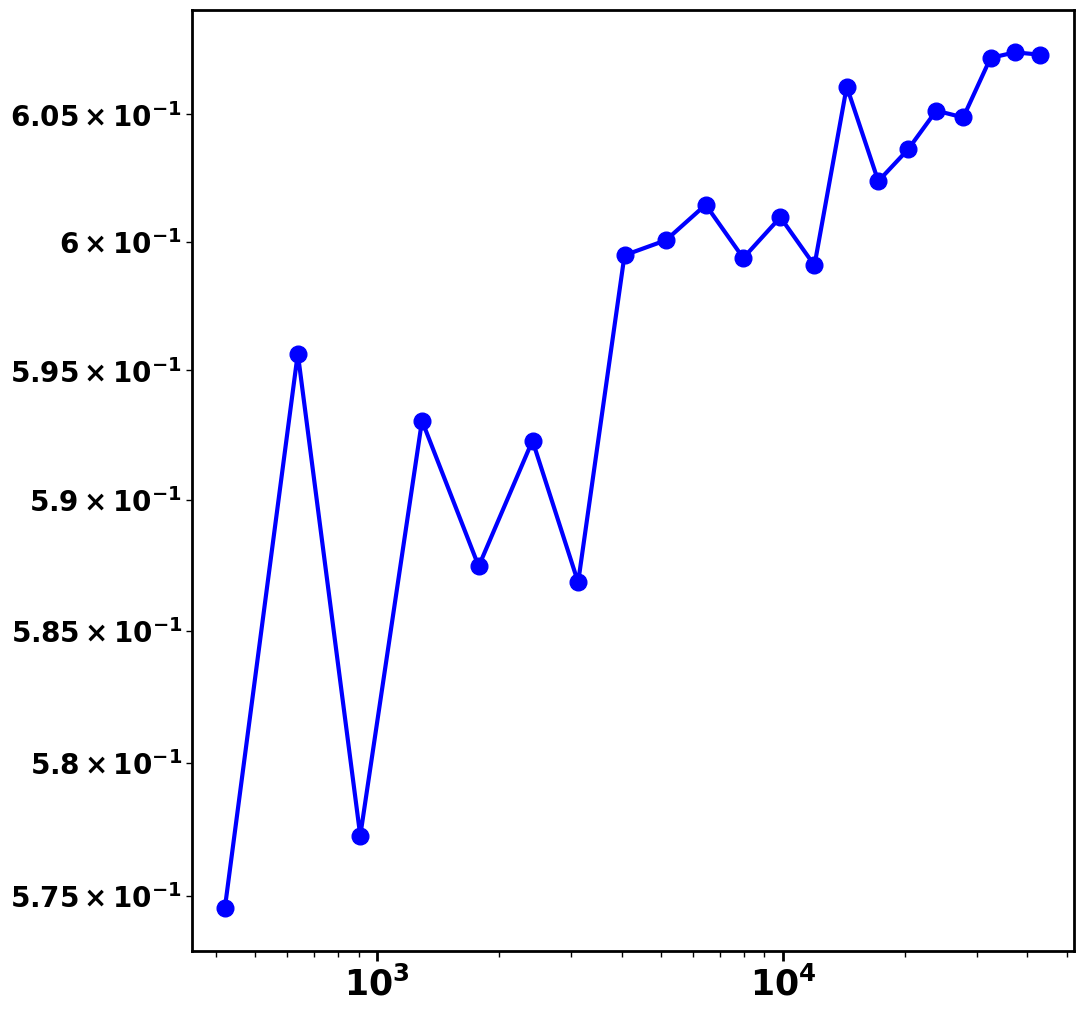

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

ax.loglog(nums_Vs, vals, 
          'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

# for num_Vs in coefficients:
#     ax.scatter(np.ones(len(coefficients[num_Vs])) * num_Vs, coefficients[num_Vs], c='b', alpha=0.2)

ax.set_xlim([350, 52000])

style_plot(fig, ax, aspect=None)

# ax.hlines(y=richardson_extrapolated_value, xmin=50, xmax=100000, color='r', linestyle='--', linewidth=4, zorder=0)

# plt.savefig("../figures/aperiodic_monotile/coefficient_plot.png", dpi=300, bbox_inches="tight")

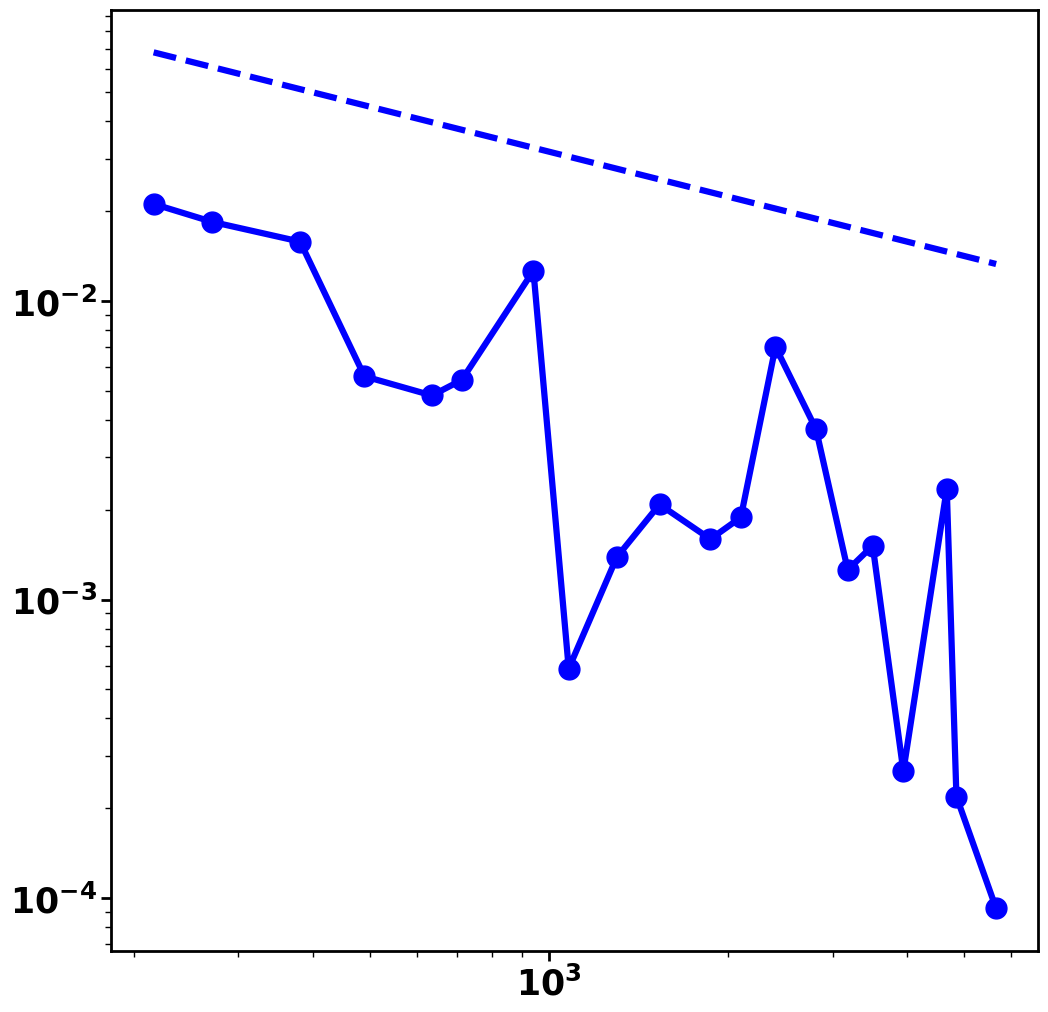

In [26]:
cauchy_nums_Vs = np.array([np.abs(nums_Vs[i] - nums_Vs[i + 1]) for i in range(len(nums_Vs) - 1)])
cauchy_coefficients = np.array([np.abs(vals[i] - vals[i + 1]) for i in range(len(vals) - 1)])

eigenvalue_linewidth = 4.5
eigenvalue_markersize = 15

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.loglog(cauchy_nums_Vs, cauchy_coefficients, 
          'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(cauchy_nums_Vs, cauchy_nums_Vs**(-0.5) / 1, 
          '--', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

style_plot(fig, ax, aspect=None)

# plt.savefig("../figures/aperiodic_monotile/coefficient_cauchy_convergence_plot.png", dpi=300, bbox_inches="tight")